In [1]:
import tensorflow

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers
from keras import regularizers

In [9]:
model0 = models.Sequential()
model0.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model0.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model0.add(layers.Dense(1, activation='sigmoid'))

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
model0.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6027 - acc: 0.7008 - val_loss: 0.4091 - val_acc: 0.8650
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3431 - acc: 0.8969 - val_loss: 0.3132 - val_acc: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2436 - acc: 0.9272 - val_loss: 0.2832 - val_acc: 0.8922
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1866 - acc: 0.9440 - val_loss: 0.2727 - val_acc: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1554 - acc: 0.9547 - val_loss: 0.2813 - val_acc: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1244 - acc: 0.9613 - val_loss: 0.2855 - val_acc: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0994 - acc: 0.9727 - val_loss: 0.3097 - val_acc: 0.8824
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0857 - a

In [ ]:
30/30 [==============================] - 1s 34ms/step - loss: 0.0920 - acc: 0.9651 - val_loss: 0.5470 - val_acc: 0.8812

In [13]:
history = model0.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6405 - acc: 0.7032 - val_loss: 0.4506 - val_acc: 0.8523
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3814 - acc: 0.9017 - val_loss: 0.3701 - val_acc: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2992 - acc: 0.9205 - val_loss: 0.3356 - val_acc: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2510 - acc: 0.9374 - val_loss: 0.3280 - val_acc: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2255 - acc: 0.9488 - val_loss: 0.3310 - val_acc: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2134 - acc: 0.9533 - val_loss: 0.3342 - val_acc: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1993 - acc: 0.9592 - val_loss: 0.3383 - val_acc: 0.8841
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1939 - a

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7455 - acc: 0.8524


In [ ]:
782/782 [==============================] - 1s 2ms/step - loss: 0.5979 - acc: 0.8715

In [ ]:
30/30 [==============================] - 1s 34ms/step - loss: 0.0920 - acc: 0.9651 - val_loss: 0.5470 - val_acc: 0.8812

In [14]:
results = model0.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4790 - acc: 0.8546


In [15]:
history_dict = history.history

In [16]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [17]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

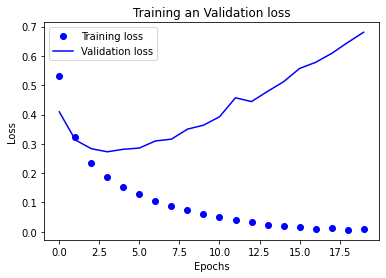

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(20)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training an Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show>

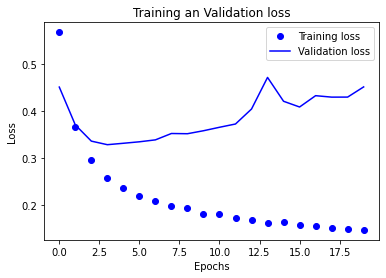

In [18]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(20)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training an Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

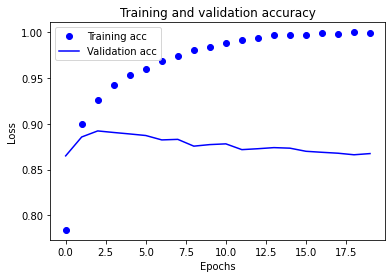

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

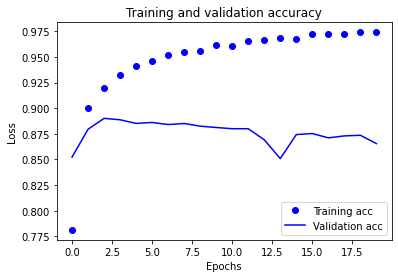

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=4, batch_size=512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.5493 - accuracy: 0.7470
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2713 - accuracy: 0.9083
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1945 - accuracy: 0.9353
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3026 - accuracy: 0.8821


In [ ]:
model.predict(x_test)

array([[0.00931904],
       [1.        ],
       [0.9989153 ],
       ...,
       [0.00280812],
       [0.02143365],
       [0.76823866]], dtype=float32)

In [ ]:
model1.predict(x_test)

array([[0.22594571],
       [0.99995255],
       [0.9628072 ],
       ...,
       [0.16019604],
       [0.08767685],
       [0.7712773 ]], dtype=float32)

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results1 = model2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5950 - accuracy: 0.7072
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.3118 - accuracy: 0.9053
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2195 - accuracy: 0.9254
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.8844


In [ ]:
results1

[0.29551470279693604, 0.8844000101089478]

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=4, batch_size=512)
results3 = model3.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 43ms/step - loss: 0.5133 - accuracy: 0.7324
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2329 - accuracy: 0.9168
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.1744 - accuracy: 0.9360
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3364 - accuracy: 0.8736


In [ ]:
results3

[0.3364447355270386, 0.8735600113868713]

In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=4, batch_size=512)
results4 = model4.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.1872 - accuracy: 0.7540
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.0827 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.0588 - accuracy: 0.9338
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.8855


In [ ]:
results4

[0.08509562164545059, 0.8854799866676331]

In [ ]:
model5 = models.Sequential()
model5.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model5.add(layers.Dense(16, activation='tanh'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model5.fit(x_train, y_train, epochs=4, batch_size=512)
results5 = model5.evaluate(x_test, y_test)

KeyboardInterrupt: ignored

In [ ]:
results5

In [20]:
import numpy as np

In [56]:
a1 = [[1,2,3,4],[5,6,7,8]]

In [58]:
a1 *= np.random.randint(0, high=2)

In [59]:
a1

[]

In [60]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [61]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [62]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6512 - acc: 0.5957 - val_loss: 0.4814 - val_acc: 0.8349
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5103 - acc: 0.7620 - val_loss: 0.3721 - val_acc: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4141 - acc: 0.8248 - val_loss: 0.3219 - val_acc: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3486 - acc: 0.8659 - val_loss: 0.2901 - val_acc: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3071 - acc: 0.8846 - val_loss: 0.2748 - val_acc: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2674 - acc: 0.9039 - val_loss: 0.2845 - val_acc: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2382 - acc: 0.9199 - val_loss: 0.2732 - val_acc: 0.8909
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2168 - a

In [63]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.5979 - acc: 0.8715
